# Análise exploratória dos dados de Crunchbase

Após extração dos dados e conversão para CSVs, iremos unifica-los em uma base única para fazer a maiores explorações e também análises.

In [2]:
import pandas as pd
import numpy as np

### Carregando os dados: 

Análise dos arquivos individualmente

In [3]:
# Carregando o arquivo de objects
objects = pd.read_csv("../data/cb_objects.csv", header=0)
objects.head()

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [4]:
# Criando um dataframe de companhias
companies = objects.loc[objects.loc[:,"entity_type"]=='Company']
companies.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [5]:
# Número de companhias com IDs únicos
companies.loc[:,"id"].nunique()

196553

In [6]:
# Carregando o arquivo de acquisitions
acquisitions = pd.read_csv("../data/cb_acquisitions.csv", header=0)
acquisitions.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europe’s Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner ? This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [7]:
# Fazendo um left join para adicionar os dados de  companhias que foram adquiridas.
companiesWithAcquiredFlag = pd.merge(companies, acquisitions, how='left', left_on='id', right_on='acquired_object_id')
companiesWithAcquiredFlag.head()

,id_x,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at_y,updated_at_y
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,c:377,c:100,cash,0.0,USD,2005-05-29,http://www.there.com/pr_acquisition.html,Makena Technologies Acquires There from Forter...,2007-08-07 05:01:46,2011-08-22 00:03:07
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# companiesWithAcquiredFlag.count()

In [9]:
# Verificando a proporção
#num_total = np.sum(pd.notna(companiesWithAcquiredFlag.loc[:,'id_x'])*1)
num_total = companiesWithAcquiredFlag.loc[:,'id_x'].drop_duplicates().count()
print(num_total)
# Quantidade de companhias que foram adquiridas = 9544
num_acquired = np.sum(pd.notna(companiesWithAcquiredFlag.drop_duplicates('id_x').loc[:,'acquired_object_id'])*1)
print(num_acquired)
# Percentual de empresas adquiridas na base
print('{:f}'.format(num_acquired / num_total))

196553
9394
0.047794


In [10]:
# Carregando o arquivo de investments
investments = pd.read_csv("../data/cb_investments.csv", header=0)
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [11]:
companiesInvested = investments.groupby('funded_object_id')
# companiesInvested.head()

In [12]:
# Fazendo um left join para adicionar os dados de empresas que receberam investimentos financeiros.
companies2 = pd.merge(companiesWithAcquiredFlag, investments, how='left', left_on='id_x', right_on='funded_object_id')
companies2.head()

,id_x,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,source_url,source_description,created_at_y,updated_at_y,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,1289.0,888.0,c:1,f:430,2007-11-07 01:01:43,2008-05-19 03:39:17
1,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,1290.0,888.0,c:1,f:3,2007-11-07 01:01:43,2008-05-19 03:39:17
2,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,1291.0,889.0,c:1,f:4,2007-11-07 01:05:01,2008-05-19 03:39:17
3,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,1292.0,889.0,c:1,f:430,2007-11-07 01:05:01,2008-05-19 03:39:17
4,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,1293.0,889.0,c:1,f:3,2007-11-07 01:05:01,2008-05-19 03:39:17


In [14]:
# Quantidade de companhias que receberam investimento = 
num_invested = np.sum(pd.notna(companies2.drop_duplicates('id_x').loc[:,'acquired_object_id'])*1)
print(num_acquired)

9394


In [15]:
# Carregando os dados de IPO
IPO = pd.read_csv("../data/cb_ipos.csv", header=0)
IPO['IPO'] = 1
IPO.head()

,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at,IPO
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59,1
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46,1
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16,1
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08,1
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22,1


In [16]:
companiesIPO = pd.merge(companiesWithAcquiredFlag, IPO, how='left', left_on='id_x', right_on='object_id')
companiesIPO.head()

,id_x,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url_y,source_description_y,created_at,updated_at,IPO
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Quantidade de empresas que tiveram IPO
pd.notna(companiesIPO.loc[:,'IPO']).sum()

1243

In [94]:
companiesWithFundingRounds = pd.merge(companiesIPO, funding_rounds_pivoted, how='left', left_on='id_x', right_on='object_id')
companiesWithFundingRounds.head()

,id_x,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,IPO,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,NaN,0.0,0.0,0.0,0.0,0.0,5250000.0,9500000.0,25000000.0,0.0
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Carregando os dados de aportes
funding_rounds = pd.read_csv("../data/cb_funding_rounds.csv", header=0)
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [96]:
# Pivotando os investimentos no tipo pela rodada
funding_rounds_pivoted = funding_rounds.pivot_table(index='object_id', columns='funding_round_type', 
                                                    values='raised_amount_usd', aggfunc='sum', fill_value=0)
funding_rounds_pivoted.head()

funding_round_type,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
object_id,,,,,,,,,
c:1,0,0,0,0,0,5250000,9500000,25000000,0
c:1001,0,0,0,0,0,5000000,0,0,0
c:10014,0,0,0,0,0,0,0,0,0
c:10015,0,0,0,0,0,2000000,9000000,55000000,2069200
c:100155,0,0,375293,0,0,0,9750000,0,0


In [131]:
# Gerando a matriz de covariância utilizando a função numpy.cov
# como a função utiliza linhas => variáveis
#e colunas => amostras vamos utilizar a matriz transposta
X_cov = np.cov(np.transpose(funding_rounds_pivoted.iloc[:,1:]))
# o mesmo que na biblioteca scikit learn: pca.get_covariance()
df_cov = pd.DataFrame(X_cov)
df_cov

,0,1,2,3,4,5,6,7
0,6.232542e+10,-6.717800e+09,-2.627684e+09,-4.124479e+09,3.587986e+09,-9.072747e+09,-1.591038e+10,1.655584e+10
1,-6.717800e+09,1.445824e+15,-5.598328e+11,9.393205e+12,4.869605e+12,6.575841e+12,4.108425e+13,4.956128e+13
2,-2.627684e+09,-5.598328e+11,1.166235e+15,1.374307e+13,1.998737e+11,1.399387e+11,-2.115084e+11,-1.282938e+12
3,-4.124479e+09,9.393205e+12,1.374307e+13,3.691184e+14,6.416164e+11,9.308608e+11,2.218532e+13,1.049755e+13
4,3.587986e+09,4.869605e+12,1.998737e+11,6.416164e+11,9.005093e+13,9.629138e+12,9.604510e+12,6.871197e+12
5,-9.072747e+09,6.575841e+12,1.399387e+11,9.308608e+11,9.629138e+12,5.400536e+13,3.350043e+13,5.982916e+12
6,-1.591038e+10,4.108425e+13,-2.115084e+11,2.218532e+13,9.604510e+12,3.350043e+13,3.360941e+14,6.743169e+13
7,1.655584e+10,4.956128e+13,-1.282938e+12,1.049755e+13,6.871197e+12,5.982916e+12,6.743169e+13,4.885443e+14


In [133]:
# Calculando a matriz de correlação
df_cov.corr()

,0,1,2,3,4,5,6,7
0,1.000000,-0.206435,-0.134125,-0.186563,-0.095932,-0.454296,-0.391934,0.108275
1,-0.206435,1.000000,-0.158196,-0.142500,-0.142894,-0.143797,-0.055651,-0.039285
2,-0.134125,-0.158196,1.000000,-0.113285,-0.201409,-0.286383,-0.232076,-0.195533
3,-0.186563,-0.142500,-0.113285,1.000000,-0.214758,-0.264809,-0.103391,-0.150045
4,-0.095932,-0.142894,-0.201409,-0.214758,1.000000,0.022855,-0.111339,-0.129484
5,-0.454296,-0.143797,-0.286383,-0.264809,0.022855,1.000000,0.441806,-0.121247
6,-0.391934,-0.055651,-0.232076,-0.103391,-0.111339,0.441806,1.000000,0.137696
7,0.108275,-0.039285,-0.195533,-0.150045,-0.129484,-0.121247,0.137696,1.000000


In [121]:
# Aplicando PCA em funding_rounds_pivoted por ser um dataset de valores quantitativos
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_all = pca.fit_transform(funding_rounds_pivoted.iloc[:,1:])
pca.explained_variance_ratio_

array([3.67183335e-01, 2.95314491e-01, 1.29882289e-01, 9.40623306e-02,
       7.81967319e-02, 2.31099723e-02, 1.22350722e-02, 1.57780820e-05])

In [120]:
# Probabilidade cumulativa das componentes principais
pca.explained_variance_ratio_.cumsum()

array([0.36718333, 0.66249783, 0.79238011, 0.88644245, 0.96463918,
       0.98774915, 0.99998422, 1.        ])

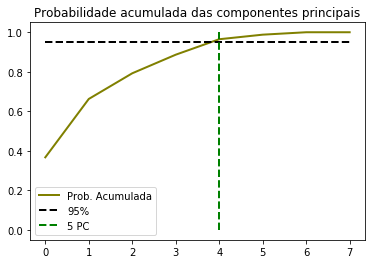

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline 
y = pca.explained_variance_ratio_.cumsum()
x = np.arange(y.shape[0])

y1 = np.ones(y.shape[0])*0.95
x2 = np.ones(y.shape[0])*4
y2 = np.linspace(0.0, 1.0, num=y.shape[0])

plt.plot( x, y, marker='', color='olive', linewidth=2, label="Prob. Acumulada")
plt.plot( x, y1, marker='', color='black', linewidth=2, linestyle='dashed', label="95%")
plt.plot( x2, y2, marker='', color='green', linewidth=2, linestyle='dashed', label="5 PC")
plt.title('Probabilidade acumulada das componentes principais')
plt.legend()
